<a href="https://colab.research.google.com/github/tranlybuu/Project_HUET_PhanTichVaThongKeDuLieu/blob/main/PTTK_Suy_dien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Đường dẫn của file csv**


In [168]:
Diet_R = "https://raw.githubusercontent.com/tranlybuu/Project_HUET_PhanTichVaThongKeDuLieu/main/Diet_R.csv"

**Các thư viện cần dùng**

In [169]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

**Hàm vẽ Plot**

In [170]:
def hist_plot(data):
    # Kiem tra data co chuan hay khong?
    mean = np.mean(data)
    # ddof=1 :: hiệu chỉnh
    std = np.std(data, ddof=1)
    domain = np.linspace(np.min(data), np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    #density=True :: chuẩn hóa dữ liệu về normal
    plt.hist(data, edgecolor='green', density=True)
    plt.show()
    
def qq_plot(data):
    def standadize(data):
        mean = np.mean(data)
        std = np.std(data)
        return (data - mean)/std
    
    sm.qqplot(standadize(data), line ='45')
    plt.show()



**Hàm Kolmogorov để kiểm tra xem các mẫu hiện tại có tuân theo phân phối chuẩn hay không**

In [171]:
def Kolmogorov(data):
    print("Kiểm định Kolmogorov -", data.name)
    k, p = stats.kstest(rvs=data, cdf='norm', args=(np.mean(data), np.std(data)))
    if p > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại không tuân theo luật phân phối chuẩn''')
    print("------------------------------")

**Hàm Barlett dùng để kiểm tra các mẫu hiện tại có mang tính đồng nhất về phương sai hay không**

In [172]:
def bartlett(a, b, c): 
    print("Kiểm định Bartlett:")
    stat, pvalue = stats.bartlett(a, b, c)
    print("Statistic =", stat, "\n",
          "p value =", pvalue)
    if pvalue > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. 
        Điều này ngụ ý các mẫu hiện tại mang tính đồng nhất về phương sai''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. 
         Điều này ngụ ý mẫu hiện tại không đồng nhất về phương sai''')

def bartlett1(a, b): 
    print("Kiểm định Bartlett:")
    stat, pvalue = stats.bartlett(a, b)
    print("Statistic =", stat, "\n",
          "p value =", pvalue)
    if pvalue > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. 
        Điều này ngụ ý các mẫu hiện tại mang tính đồng nhất về phương sai''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. 
         Điều này ngụ ý mẫu hiện tại không đồng nhất về phương sai''')

**Hàm kiểm định ANOVA 1 chiều**

In [173]:
def anova(a, b, c):
    df = (a, b, c)
    print("Kiểm định ANOVA:")
    stat, pvalue = stats.f_oneway(a, b, c)
    print("Stat =", stat, "\n", "p value =", pvalue)
    if pvalue < 0.05:
        print("Có bằng chứng thống kê để bác bỏ giả thuyết H0")
    else:
        print("Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0")

**Hàm kết luận**

In [174]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

**Đọc và trích xuất dữ liệu từ file csv**

In [175]:
data = pd.read_csv(Diet_R)
data.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


**Xóa dữ liệu người thứ 25 và 26 vì thiếu dữ liệu**

In [176]:
data.drop(data.loc[data['Person']== 25].index, inplace = True)
data.drop(data.loc[data['Person']== 26].index, inplace = True)
data.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5
10,9,0,28,165,70,1,68.1
11,10,0,45,165,70,1,66.9


**gender = 0: nữ và gender = 1: nam**

In [177]:
person = []
print(len(data))
for i in range (1, len(data)+1):
    person.append(i)
data['Person'] = person
gen = data.set_index('Person')
new_data = gen.sort_index()
new_data.head(10)


76


,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
6,0,50,201,66,1,64.0
7,0,37,174,67,1,65.0
8,0,28,176,69,1,60.5
9,0,28,165,70,1,68.1


#Phát biểu giả thuyết
# $$H_{0}: \mu_{0} = \mu_{1}$$
#    Cân nặng trung bình của trước và sau khi giảm cân là bằng nhau
# $$H_{1}: \mu_{0} <> \mu_{1}$$
#    Cân nặng trung bình của trước và sau khi giảm cân là khác nhau

In [178]:
stat, p_value = stats.ttest_ind(data["pre.weight"], data["weight6weeks"])
print('Stat =', stat, 'P_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          có sự thay đổi về cân nặng trước và sau khi giảm cân''')
else:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
    không có sự thay đổi về cân nặng trước và sau khi giảm cân''')

Stat = 3.0342255247628476 P_value = 0.0028431949414180584
Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          có sự thay đổi về cân nặng trước và sau khi giảm cân


Text(0.5, 1.0, 'Cân nặng trước và sau khi giảm cân')

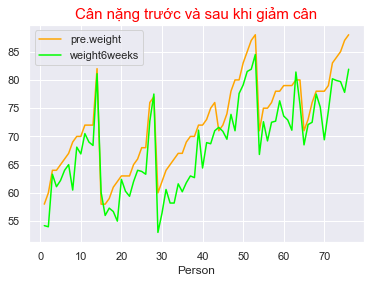

In [179]:
sns.set()
new_data[['pre.weight', 'weight6weeks']].plot(color = ['orange', 'lime'])
plt.title('Cân nặng trước và sau khi giảm cân', fontsize = 15, color = 'red')

**Tính chỉ số cân năng đã giảm**

**Thêm cột cân nặng đã giảm vào cuối bảng**

In [180]:
weightlost = new_data["pre.weight"] - new_data["weight6weeks"] 
new_data['weightlost'] = weightlost.values
new_data.head(10)

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
Person,,,,,,,
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8
6,0,50,201,66,1,64.0,2.0
7,0,37,174,67,1,65.0,2.0
8,0,28,176,69,1,60.5,8.5
9,0,28,165,70,1,68.1,1.9


**Kết hợp với đọc tài liệu docx ta biết được n = 78 và có 3 nhóm diet: 1, 2, 3**

In [181]:
weightlost_1 = []
weightlost_2 = []
weightlost_3 = []
data1 = new_data[['Diet', 'weightlost', 'gender']]
wl = data1["weightlost"]
gd = data1["gender"]
diet = data1['Diet']
p = data1.index
for i in range(1, len(p)):
    if diet[i] == 1 :
        weightlost_1.append(wl[i])
    if diet[i] == 2:
        weightlost_2.append(wl[i])
    if diet[i] == 3:
        weightlost_3.append(wl[i])
    
weight_lost = list(zip(weightlost_1, weightlost_2, weightlost_3))
df =  pd.DataFrame(weight_lost, columns = ("Diet 1", "Diet 2", "Diet 3"))
df.head()        

,Diet 1,Diet 2,Diet 3
0,3.8,-2.1,7.0
1,6.0,2.0,5.6
2,0.7,1.7,3.4
3,2.9,4.3,6.8
4,2.8,7.0,7.8


**Lấy dữ liệu và kiểm định Kolmogorov**

In [182]:
diet1 = df['Diet 1']
diet2 = df['Diet 2']
diet3 = df['Diet 3']

Kiểm định Kolmogorov - Diet 1
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
------------------------------


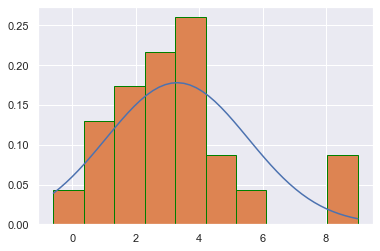

In [183]:
Kolmogorov(diet1)
hist_plot(diet1)

Kiểm định Kolmogorov - Diet 2
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
------------------------------


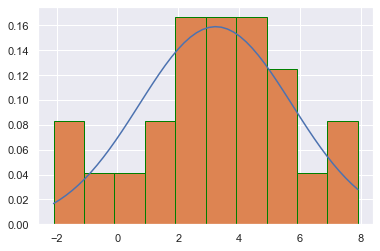

In [184]:
Kolmogorov(diet2)
hist_plot(diet2)

Kiểm định Kolmogorov - Diet 3
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
------------------------------


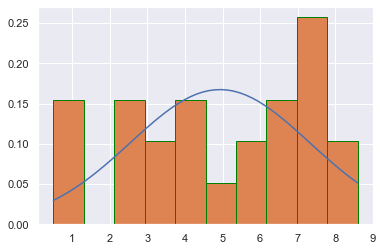

In [185]:
Kolmogorov(diet3)
hist_plot(diet3)

**Kiểm định Barlett**

In [186]:
bartlett(diet1, diet2, diet3)

Kiểm định Bartlett:
Statistic = 0.28733374560171415 
 p value = 0.8661762468702207
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. 
        Điều này ngụ ý các mẫu hiện tại mang tính đồng nhất về phương sai


**Phân tích anova 1 chiều**

In [187]:
anova(diet1, diet2, diet3)

Kiểm định ANOVA:
Stat = 3.9487895677240754 
 p value = 0.02378518834763086
Có bằng chứng thống kê để bác bỏ giả thuyết H0


Text(0.5, 1.0, 'Diet 3')

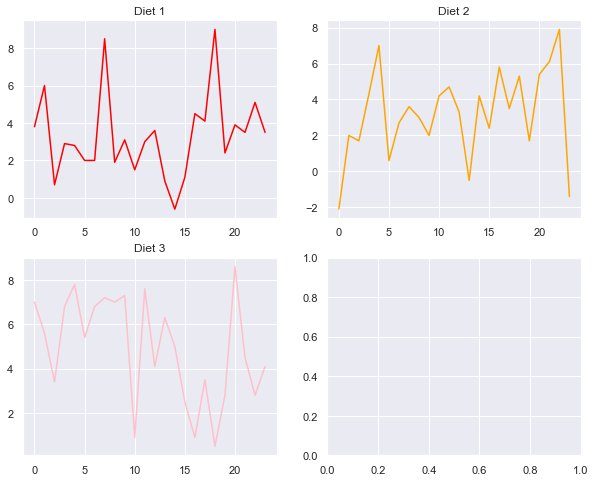

In [188]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 8))
ax1.plot(diet1, color = 'red')
ax1.set_title("Diet 1")
ax2.plot(diet2, color = 'orange')
ax2.set_title("Diet 2")
ax3.plot(diet3, color = 'pink')
ax3.set_title("Diet 3")

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


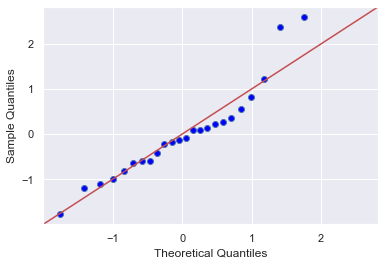

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


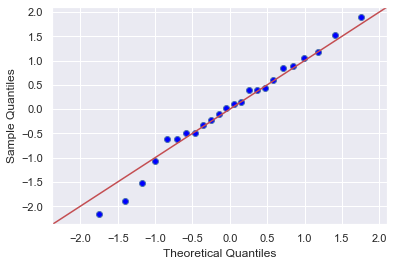

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


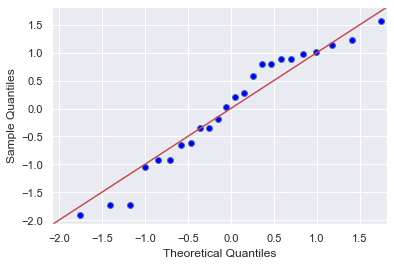

In [189]:
qq_plot(diet1)
qq_plot(diet2)
qq_plot(diet3)

**Hàm tính MIN, MAX và STD**

In [190]:
def mms(a):
    print(a.name)
    Min = a.min()
    Max = a.max()
    print("min =", Min)
    print("max =", Max)
    print("max - min =", Max - Min)
    a.std()
    print("--"*15)

In [191]:
d1 = mms(diet1)
d2 = mms(diet2)
d3 = mms(diet3)
print(d1)
print(d2)
print(d3)

Diet 1
min = -0.5999999999999943
max = 9.0
max - min = 9.599999999999994
------------------------------
Diet 2
min = -2.1000000000000014
max = 7.900000000000006
max - min = 10.000000000000007
------------------------------
Diet 3
min = 0.5
max = 8.599999999999994
max - min = 8.099999999999994
------------------------------
None
None
None


In [192]:
mean1 = diet1.mean()
mean2 = diet2.mean()
mean3 = diet3.mean()

In [193]:
print("Mean Diet1 =", mean1)
print("Mean Diet2 =", mean2)
print("Mean Diet3 =", mean3)
if mean1 < mean2:
    if mean2 > mean3:
        print("Nhóm diet 2 giảm cân hiệu quả nhất")
    else:
        print("Nhóm diet 3 giảm cân hiệu quả nhất")
else:
    if mean1 > mean3:
        print("Nhóm diet 1 giảm cân hiệu quả nhất")
    else:
        print("Nhóm diet 3 giảm cân hiệu quả nhất")

Mean Diet1 = 3.2999999999999994
Mean Diet2 = 3.225
Mean Diet3 = 4.933333333333332
Nhóm diet 3 giảm cân hiệu quả nhất


In [241]:
data2 = new_data[['gender', 'weightlost']]
data2.head(20)

,gender,weightlost
Person,,
1,0,3.8
2,0,6.0
3,0,0.7
4,0,2.9
5,0,2.8
6,0,2.0
7,0,2.0
8,0,8.5
9,0,1.9


In [232]:
wl_1 = []
wl_2 = []
wl_3 = []
wl1 = data2["weightlost"]
gd1 = data2["gender"]
for i in range(1, len(data2)+1):
    if gd1[i] == "1":          # "1" vì giá trị của cột gender hiện tại đang ở kiểu string
        wl_1.append(wl1[i])
    else:
        wl_2.append(wl1[i])

weight_lost_gen = list(zip(wl_1, wl_2))
df2 = pd.DataFrame(weight_lost_gen, columns = ("Nam", "Nữ"))
df2.head()

,Nam,Nữ
0,-0.6,3.8
1,1.1,6.0
2,4.5,0.7
3,4.1,2.9
4,9.0,2.8


In [233]:
gen_nam = df2["Nam"]
gen_nu = df2["Nữ"]

Kiểm định Kolmogorov - Nam
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
------------------------------


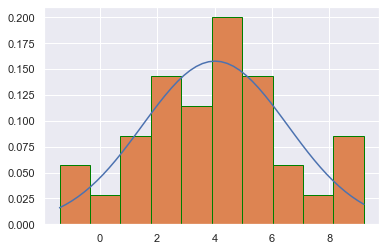

In [234]:
Kolmogorov(gen_nam)
hist_plot(gen_nam)

Kiểm định Kolmogorov - Nữ
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
------------------------------


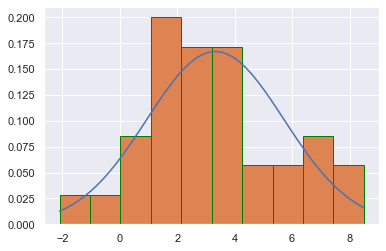

In [235]:
Kolmogorov(gen_nu)
hist_plot(gen_nu)

In [236]:
bartlett1(gen_nam, gen_nu)
stat, p_value = stats.ttest_ind(gen_nam, gen_nu)
print('Stat =', stat, 'P_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          có sự khác nhau về sự thay đổi cân nặng sau khi giảm cân của 2 giới tính''')
else:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
    không có sự khác nhau về sự thay đổi cân nặng sau khi giảm cân của 2 giới tính''')

Kiểm định Bartlett:
Statistic = 0.10360504752268473 
 p value = 0.7475455904117406
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. 
        Điều này ngụ ý các mẫu hiện tại mang tính đồng nhất về phương sai
Stat = 1.1356896084531398 P_value = 0.2603216007162455
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
    không có sự khác nhau về sự thay đổi cân nặng sau khi giảm cân của 2 giới tính


In [237]:
p = {}
p['mean1'] = np.mean(gen_nam)
p['mean2'] = np.mean(gen_nu)
p['score'], p['p_value'] = stats.ttest_1samp(gen_nam, p['mean2'])
results(p)

,mean1,mean2,score,p_value,KetLuan
,4.015152,3.327273,1.561983,0.128129,Chấp nhận H0 với mức ý nghĩa 0.05


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


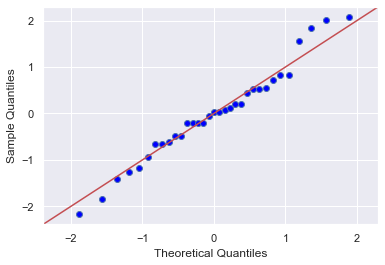

In [239]:
qq_plot(gen_nam)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


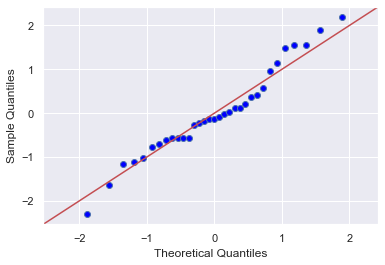

In [240]:
qq_plot(gen_nu)

In [ ]:
s